In [44]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import numpy as np
import statsmodels.api as sm


In [3]:
df = pd.read_csv('CarPrice_Assignment (1).csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
X = df[['horsepower', 'curbweight', 'enginesize', 'highwaympg']]

y = df['price']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
SS = StandardScaler()

X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


In [8]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 2747.918007387286
Mean Squared Error: 14367324.983662283
R² Score: 0.8180061666029927


In [9]:
feature_names = ['horsepower', 'curbweight', 'enginesize', 'highwaympg']

print("="*50)
print("MODEL COEFFICIENTS:")
for feature, coef in zip(feature_names, model.coef_):  # no [0] here
    print(f"{feature:>12}: {coef:>10.2f}")
print(f"{'intercept':>12}: {model.intercept_:>10.2f}")


MODEL COEFFICIENTS:
  horsepower:    2073.03
  curbweight:    2055.83
  enginesize:    3189.13
  highwaympg:    -172.72
   intercept:   13223.41


In [10]:
print("\nMODEL PERFORMANCE:")
print(f"{'MSE':>12}: {mean_squared_error(y_test, y_pred):>10.2f}")
print(f"{'RMSE':>12}: {np.sqrt(mean_squared_error(y_test, y_pred)):>10.2f}")
print(f"{'R-Squared':>12}: {r2_score(y_test, y_pred):>10.2f}")
print("="*50)


MODEL PERFORMANCE:
         MSE: 14367324.98
        RMSE:    3790.43
   R-Squared:       0.82


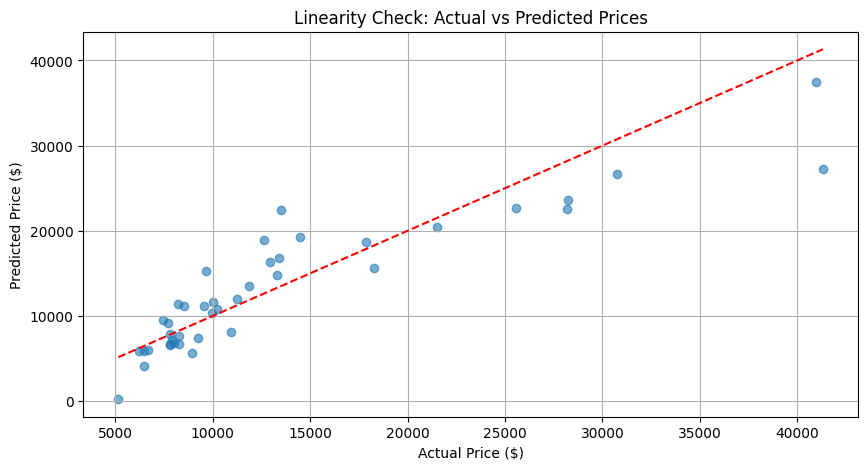


Durbin-Watson Statistic: 2.25 
(Values close to 2 indicate no autocorrelation)


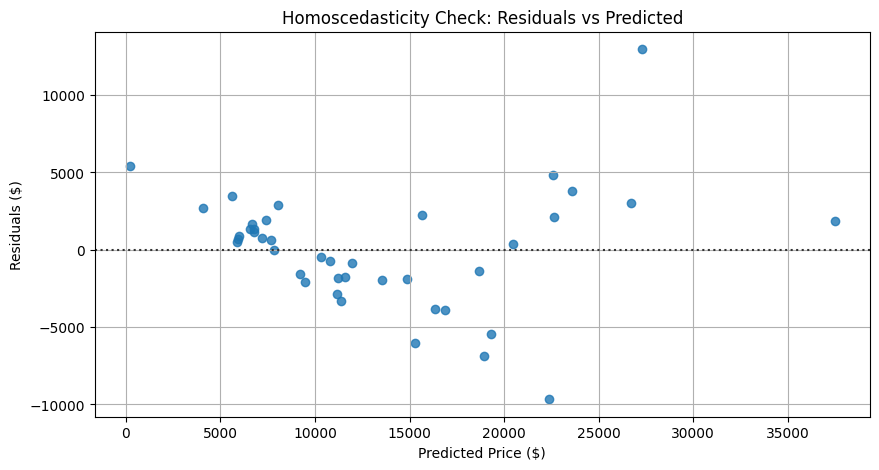

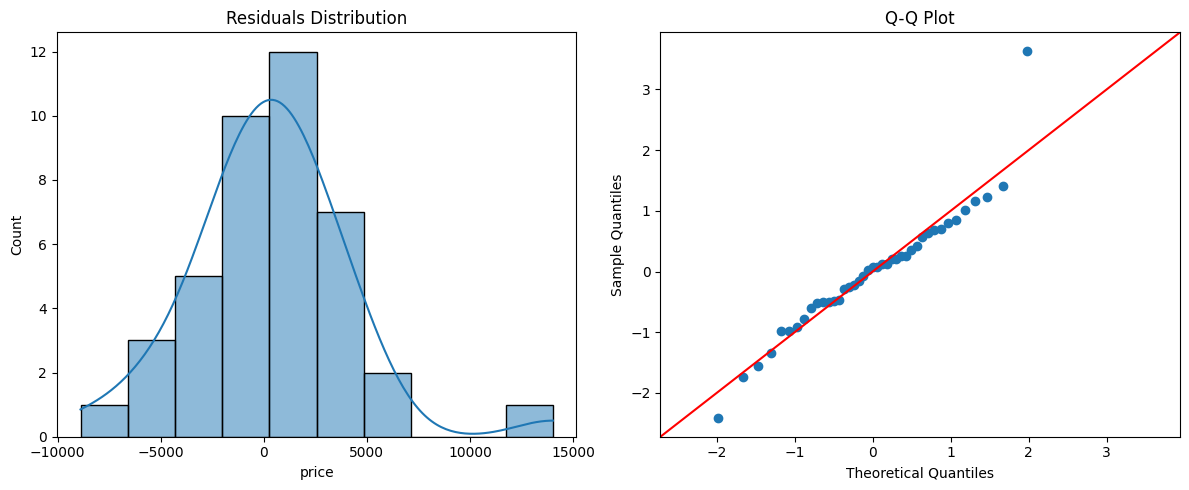

In [11]:
# 1. Linearity Check
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title("Linearity Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()

residuals = y_test - y_pred
dw_test = sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f}",
      "\n(Values close to 2 indicate no autocorrelation)")

# 3. Homoscedasticity check
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, line_kws={"color": "red"})  # removed lowess=True
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

# 4. Normality of residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")

sm.qqplot(residuals, line="45", fit=True, ax=ax2)
ax2.set_title("Q-Q Plot")

plt.tight_layout()
plt.show()

# 4. Normality of residuals

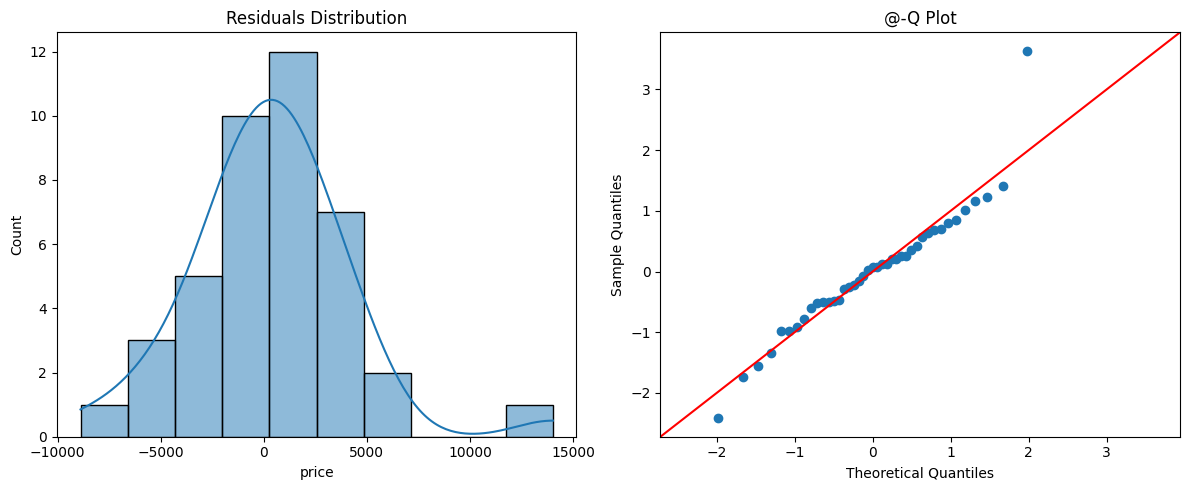

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("@-Q Plot")
plt.tight_layout()
plt.show()